In [1]:
import numpy as np
import pandas as pd

In [2]:
# Importing data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
sns.set_style('darkgrid')
import gc

In [3]:
import datetime, pytz

# Conversion function for the native timestamps in the csv file
def dateparse (time_in_secs):    
    return pytz.utc.localize(datetime.datetime.fromtimestamp(float(time_in_secs)))

In [4]:
# Importing dataset BitstampUSD.csv 
df = pd.read_csv('BitstampUSD.csv',parse_dates=[0],date_parser=dateparse)

In [5]:
# Display first 10 rows of dataset
df.head(10)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 13:22:00+00:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,2011-12-31 13:23:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-12-31 13:24:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-12-31 13:25:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-12-31 13:26:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2011-12-31 13:27:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2011-12-31 13:28:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2011-12-31 13:29:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2011-12-31 13:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2011-12-31 13:31:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Display last 10 rows of dataset
df.tail(10)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
4572247,2020-09-14 05:21:00+00:00,10328.62,10328.62,10320.06,10320.06,0.701925,7247.408456,10325.040888
4572248,2020-09-14 05:22:00+00:00,10325.90,10325.90,10319.76,10320.63,5.946843,61391.782196,10323.424144
4572249,2020-09-14 05:23:00+00:00,10320.75,10320.78,10320.75,10320.78,0.020500,211.572844,10320.772555
4572250,2020-09-14 05:24:00+00:00,10320.86,10323.64,10320.86,10323.64,1.519091,15678.664557,10321.082832
4572251,2020-09-14 05:25:00+00:00,10324.60,10324.61,10321.93,10323.28,0.349238,3605.692837,10324.470065
4572252,2020-09-14 05:26:00+00:00,10324.35,10325.89,10324.35,10325.89,0.081143,837.754188,10324.419779
4572253,2020-09-14 05:27:00+00:00,10331.41,10331.97,10326.68,10331.97,0.572817,5918.028741,10331.444396
4572254,2020-09-14 05:28:00+00:00,10327.20,10331.47,10321.33,10331.47,2.489909,25711.238323,10326.175283
4572255,2020-09-14 05:29:00+00:00,10330.02,10334.78,10328.64,10334.78,4.572660,47253.747619,10333.972651
4572256,2020-09-14 05:30:00+00:00,10338.82,10338.82,10332.37,10332.37,1.292006,13349.565122,10332.429402


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572257 entries, 0 to 4572256
Data columns (total 8 columns):
 #   Column             Dtype              
---  ------             -----              
 0   Timestamp          datetime64[ns, UTC]
 1   Open               float64            
 2   High               float64            
 3   Low                float64            
 4   Close              float64            
 5   Volume_(BTC)       float64            
 6   Volume_(Currency)  float64            
 7   Weighted_Price     float64            
dtypes: datetime64[ns, UTC](1), float64(7)
memory usage: 279.1 MB


### Data Preprocessing

In [8]:
# Preprocessing data
# Removing Nan values 
# Volume/trades are a single event so fill na's with zeroes 
df['Volume_(BTC)'].fillna(value=0, inplace=True)
df['Volume_(Currency)'].fillna(value=0, inplace=True)
df['Weighted_Price'].fillna(value=0, inplace=True)

# The OHLC data which is a continuous timeseries so using fill forwards for these values
df['Open'].fillna(method='ffill', inplace=True)
df['High'].fillna(method='ffill', inplace=True)
df['Low'].fillna(method='ffill', inplace=True)
df['Close'].fillna(method='ffill', inplace=True)

In [9]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 13:22:00+00:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,2011-12-31 13:23:00+00:00,4.39,4.39,4.39,4.39,0.000000,0.0,0.00
2,2011-12-31 13:24:00+00:00,4.39,4.39,4.39,4.39,0.000000,0.0,0.00
3,2011-12-31 13:25:00+00:00,4.39,4.39,4.39,4.39,0.000000,0.0,0.00
4,2011-12-31 13:26:00+00:00,4.39,4.39,4.39,4.39,0.000000,0.0,0.00


In [10]:
df.sample(5)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
2744410,2017-03-24 21:24:00+00:00,988.95,991.38,988.89,991.38,1.975152,1954.594716,989.591839
2185789,2016-03-01 23:03:00+00:00,433.12,433.96,433.12,433.96,8.063294,3497.712753,433.782120
1357460,2014-07-31 05:42:00+00:00,559.00,559.00,557.65,557.65,25.538954,14244.115896,557.740773
632947,2013-03-15 02:29:00+00:00,47.10,47.10,47.10,47.10,0.200000,9.420000,47.100000
1318458,2014-07-04 03:40:00+00:00,644.30,644.88,644.30,644.88,2.010000,1296.155240,644.853353


Grouping data weekly for analysis and visualization.

In [11]:
# we will be checking for data yearly and filter it for better results

# Year 2012
start = datetime.datetime(2012, 1, 1, 0, 0, 0, 0, pytz.UTC)
end = datetime.datetime(2012, 12, 25, 0, 0, 0, 0, pytz.UTC)

# find rows between start and end time and find the first row (00:00 monday morning)
weekly_rows_12 = df[(df['Timestamp'] >= start) & (df['Timestamp'] <= end)].groupby(
    [pd.Grouper(key='Timestamp', freq='W-MON')]).first().reset_index()

weekly_rows_12.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2012-01-02 00:00:00+00:00,4.58,4.58,4.58,4.58,0.0,0.0,0.0
1,2012-01-09 00:00:00+00:00,5.00,5.00,5.00,5.00,0.0,0.0,0.0
2,2012-01-16 00:00:00+00:00,6.48,6.48,6.48,6.48,0.0,0.0,0.0
3,2012-01-23 00:00:00+00:00,7.10,7.10,7.10,7.10,0.0,0.0,0.0
4,2012-01-30 00:00:00+00:00,6.52,6.52,6.52,6.52,0.0,0.0,0.0


In [12]:
weekly_rows_12.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
48,2012-12-03 00:00:00+00:00,12.32,12.32,12.32,12.32,0.000000,0.000000,0.00
49,2012-12-10 00:00:00+00:00,12.40,12.40,12.40,12.40,0.000000,0.000000,0.00
50,2012-12-17 00:00:00+00:00,13.28,13.28,13.28,13.28,0.000000,0.000000,0.00
51,2012-12-24 00:00:00+00:00,13.02,13.02,13.02,13.02,0.000000,0.000000,0.00
52,2012-12-31 00:00:00+00:00,13.01,13.01,13.01,13.01,213.030118,2771.521839,13.01


Since the data is not very accurate and useful, so we will filter out this 2012's data

In [13]:
# Year 2013
start = datetime.datetime(2013, 1, 1, 0, 0, 0, 0, pytz.UTC)
end = datetime.datetime(2013, 12, 25, 0, 0, 0, 0, pytz.UTC)

# find rows between start and end time and find the first row (00:00 monday morning)
weekly_rows_13 = df[(df['Timestamp'] >= start) & (df['Timestamp'] <= end)].groupby(
    [pd.Grouper(key='Timestamp', freq='W-MON')]).first().reset_index()

weekly_rows_13.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2013-01-07 00:00:00+00:00,13.29,13.29,13.29,13.29,0.0,0.0,0.0
1,2013-01-14 00:00:00+00:00,13.19,13.19,13.19,13.19,0.0,0.0,0.0
2,2013-01-21 00:00:00+00:00,13.96,14.00,13.96,14.00,0.0,0.0,0.0
3,2013-01-28 00:00:00+00:00,16.49,16.74,16.49,16.74,0.0,0.0,0.0
4,2013-02-04 00:00:00+00:00,18.16,18.16,18.16,18.16,0.0,0.0,0.0


In [14]:
weekly_rows_13.sample(5)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
5,2013-02-11 00:00:00+00:00,20.37,20.60,20.37,20.60,0.000000,0.0,0.0
6,2013-02-18 00:00:00+00:00,23.80,23.80,23.80,23.80,0.000000,0.0,0.0
8,2013-03-04 00:00:00+00:00,30.40,30.40,30.40,30.40,0.651316,19.8,30.4
37,2013-09-23 00:00:00+00:00,126.11,126.40,126.00,126.40,0.000000,0.0,0.0
1,2013-01-14 00:00:00+00:00,13.19,13.19,13.19,13.19,0.000000,0.0,0.0


2013's data isn't also very accurate so we will filter it out

In [15]:
# Year 2014
start = datetime.datetime(2014, 1, 1, 0, 0, 0, 0, pytz.UTC)
end = datetime.datetime(2014, 12, 25, 0, 0, 0, 0, pytz.UTC)

# find rows between start and end time and find the first row (00:00 monday morning)
weekly_rows_14 = df[(df['Timestamp'] >= start) & (df['Timestamp'] <= end)].groupby(
    [pd.Grouper(key='Timestamp', freq='W-MON')]).first().reset_index()

weekly_rows_14.head(10)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2014-01-06 00:00:00+00:00,734.86,734.87,734.86,734.87,0.192000,141.094978,734.869679
1,2014-01-13 00:00:00+00:00,938.60,938.60,935.00,935.06,0.000000,0.000000,0.000000
2,2014-01-20 00:00:00+00:00,812.90,812.99,812.89,812.99,57.729657,46928.547794,812.901896
3,2014-01-27 00:00:00+00:00,828.20,828.20,828.20,828.20,0.006013,4.980000,828.200000
4,2014-02-03 00:00:00+00:00,786.50,786.50,786.30,786.30,0.691357,543.732198,786.470782
5,2014-02-10 00:00:00+00:00,811.68,811.68,811.26,811.26,0.183000,148.479860,811.365355
6,2014-02-17 00:00:00+00:00,663.99,663.99,656.60,660.00,2.693067,1780.382934,661.098624
7,2014-02-24 00:00:00+00:00,641.95,641.95,641.76,641.76,0.792503,508.700000,641.890063
8,2014-03-03 00:00:00+00:00,549.26,549.26,549.13,549.13,41.020328,22529.641214,549.231127
9,2014-03-10 00:00:00+00:00,675.00,677.00,668.12,673.00,50.410227,33918.736931,672.854278


In [16]:
weekly_rows_14.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
47,2014-12-01 00:00:00+00:00,386.30,386.30,385.23,385.23,0.391363,150.780151,385.269542
48,2014-12-08 00:00:00+00:00,378.17,378.17,378.17,378.17,0.014852,5.616630,378.170000
49,2014-12-15 00:00:00+00:00,367.00,367.00,366.99,366.99,4.696997,1723.757815,366.991484
50,2014-12-22 00:00:00+00:00,351.94,351.97,351.94,351.97,0.287199,101.082655,351.960072
51,2014-12-29 00:00:00+00:00,332.98,332.99,332.09,332.09,3.205553,1067.378267,332.977876


2014's data is more accurate so we will start our dataset from 2014 and remove previous years

In [17]:
# create valid date range
start = datetime.datetime(2014, 1, 1, 0, 0, 0, 0, pytz.UTC)
end = datetime.datetime(2020, 12, 25, 0, 0, 0, 0, pytz.UTC)

# find rows between start and end time and find the first row (00:00 monday morning)
weekly_rows = df[(df['Timestamp'] >= start) & (df['Timestamp'] <= end)].groupby(
    [pd.Grouper(key='Timestamp', freq='W-MON')]).first().reset_index()

# Sample of new dataset
weekly_rows.sample(10)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
53,2015-01-12 00:00:00+00:00,272.45,305.00,272.45,291.10,175.837078,50502.066285,287.209426
147,2016-10-31 00:00:00+00:00,649.67,649.67,649.14,649.14,0.552355,358.566234,649.159191
127,2016-06-13 00:00:00+00:00,584.10,584.10,584.00,584.00,30.286663,17687.439677,584.000946
297,2019-09-16 00:00:00+00:00,10258.24,10265.70,10254.10,10254.10,0.134764,1382.507859,10258.697723
174,2017-05-08 00:00:00+00:00,1403.92,1407.04,1403.92,1407.04,2.857279,4011.486207,1403.953043
341,2020-07-20 00:00:00+00:00,9283.19,9283.19,9283.19,9283.19,0.005509,51.140908,9283.190000
49,2014-12-15 00:00:00+00:00,367.00,367.00,366.99,366.99,4.696997,1723.757815,366.991484
156,2017-01-02 00:00:00+00:00,899.88,899.88,899.88,899.88,0.065199,58.671195,899.880000
306,2019-11-18 00:00:00+00:00,8722.36,8734.24,8722.36,8734.23,12.265203,107101.470770,8732.140398
103,2015-12-28 00:00:00+00:00,437.97,438.99,437.97,438.99,0.000000,0.000000,0.000000


In [18]:
weekly_rows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   Timestamp          350 non-null    datetime64[ns, UTC]
 1   Open               350 non-null    float64            
 2   High               350 non-null    float64            
 3   Low                350 non-null    float64            
 4   Close              350 non-null    float64            
 5   Volume_(BTC)       350 non-null    float64            
 6   Volume_(Currency)  350 non-null    float64            
 7   Weighted_Price     350 non-null    float64            
dtypes: datetime64[ns, UTC](1), float64(7)
memory usage: 22.0 KB


### Data Visualisation

In [19]:
# We use Plotly to create the plots 
trace1 = go.Scatter(
    x = weekly_rows['Timestamp'],
    y = weekly_rows['Open'].astype(float),
    mode = 'lines',
    name = 'Open'
)

trace2 = go.Scatter(
    x = weekly_rows['Timestamp'],
    y = weekly_rows['Close'].astype(float),
    mode = 'lines',
    name = 'Close'
)
trace3 = go.Scatter(
    x = weekly_rows['Timestamp'],
    y = weekly_rows['Weighted_Price'].astype(float),
    mode = 'lines',
    name = 'Weighted Avg'
)

layout = dict(
    title='Historical Bitcoin Prices (2014-2020) with the Slider ',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=12,
                     label='1y',
                     step='month',
                     stepmode='backward'),
                dict(count=36,
                     label='3y',
                     step='month',
                     stepmode='backward'),
                dict(count=60,
                     label='5y',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

data = [trace1,trace2, trace3]
fig = dict(data=data, layout=layout)
iplot(fig, filename = "Time Series with Rangeslider")

In [20]:
trace1 = go.Scatter(
    x = weekly_rows['Timestamp'],
    y = weekly_rows['Volume_(Currency)'].astype(float),
    mode = 'lines',
    name = 'Currency',
    marker = dict(
            color='#FFBB33')
)

layout = dict(
    title='Currency(USD) Volume traded in Bitcoin (2014-2020) with the slider',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=12,
                     label='1y',
                     step='month',
                     stepmode='backward'),
                dict(count=36,
                     label='3y',
                     step='month',
                     stepmode='backward'),
                dict(count=60,
                     label='5y',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

data = [trace1]
fig = dict(data=data, layout=layout)
iplot(fig, filename = "Time Series with Rangeslider")

In [21]:
#BTC Volume vs USD visualization
trace = go.Scattergl(
    y = weekly_rows['Volume_(BTC)'].astype(float),
    x = weekly_rows['Weighted_Price'].astype(float),
    mode = 'markers',
    marker = dict(
        line = dict(width = 1),
        color='#00FF00'
    )
)
layout = go.Layout(
    title='BTC Volume v/s USD',
    xaxis=dict(
        title='Weighted Price',
        titlefont=dict(
            family='Times New Roman, monospace',
            size=18
        )
    ),
    yaxis=dict(
        title='Volume BTC',
        titlefont=dict(
            family='Times New Roman, monospace',
            size=18
    )))
data = [trace]
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='compare_webgl')

In [22]:
from sklearn.model_selection import train_test_split
X = weekly_rows.drop('Weighted_Price',axis=1)
y = weekly_rows['Weighted_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## ARIMA Model

In [23]:
from scipy import stats
import statsmodels.api as sm
import warnings
import itertools
from itertools import product

In [24]:
data_arima = weekly_rows.copy()
data_arima.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2014-01-06 00:00:00+00:00,734.86,734.87,734.86,734.87,0.192000,141.094978,734.869679
1,2014-01-13 00:00:00+00:00,938.60,938.60,935.00,935.06,0.000000,0.000000,0.000000
2,2014-01-20 00:00:00+00:00,812.90,812.99,812.89,812.99,57.729657,46928.547794,812.901896
3,2014-01-27 00:00:00+00:00,828.20,828.20,828.20,828.20,0.006013,4.980000,828.200000
4,2014-02-03 00:00:00+00:00,786.50,786.50,786.30,786.30,0.691357,543.732198,786.470782


### Stationarity check and STL-decomposition of the series

 - Stationary Time series: Summary statistics calculated on the time series are consistent over time,  
like the mean or the variance of the observations.


 - When a time series is stationary, it can be easier to model. 

  - Non Stationary Time series: Summary statistics like the mean and variance do change over time,  
 providing a drift in the concepts a model may try to capture.

In [25]:
# Grouping data by month for easier prediction by Arima model
data_arima['Timestamp'] = data_arima['Timestamp'].dt.tz_localize(None)
data_arima = data_arima.groupby([pd.Grouper(key='Timestamp', freq='M')]).first().reset_index()
data_arima = data_arima.set_index('Timestamp')
data_arima['Weighted_Price'].fillna(method='ffill', inplace=True)

In [26]:
data_arima.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2014-01-31,734.86,734.87,734.86,734.87,0.192000,141.094978,734.869679
2014-02-28,786.50,786.50,786.30,786.30,0.691357,543.732198,786.470782
2014-03-31,549.26,549.26,549.13,549.13,41.020328,22529.641214,549.231127
2014-04-30,458.12,459.00,456.75,456.75,3.541494,1622.664707,458.186500
2014-05-31,446.71,447.70,446.71,447.70,0.485056,216.779665,446.916345


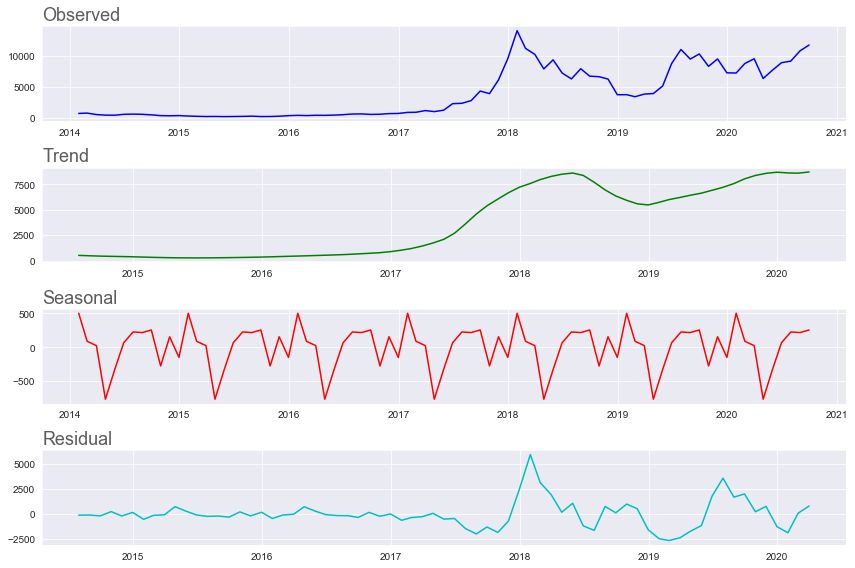

In [27]:
# Decomposing the target value of the data into trend, seasonal and residual 
# so that we can check if the time series is stationary or not
decomposition = sm.tsa.seasonal_decompose(data_arima.Weighted_Price)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

ax, fig = plt.subplots(figsize=(12,8), sharex=True)

plt.subplot(411)
plt.plot(data_arima.Weighted_Price, label='Original',color='b')
plt.title("Observed",loc="left", alpha=0.75, fontsize=18)

plt.subplot(412)
plt.plot(trend, label='Trend',color='g')
plt.title("Trend",loc="left", alpha=0.75, fontsize=18)

plt.subplot(413)
plt.plot(seasonal,label='Seasonality',color='r')
plt.title("Seasonal",loc="left", alpha=0.75, fontsize=18)

plt.subplot(414)
plt.plot(residual, label='Residuals',color='c')
plt.title("Residual",loc="left", alpha=0.75, fontsize=18)
plt.tight_layout()



From the plot above we can see a few things:  

 - Bitcoin prices are facing a strong upward trend.
 - There are some seasonal elements to the price (+- 500)
 - Most of the noise in the data was generated during the "hype" phase of 2018-2019.

Stastical tests can be performed for checking if the time series is stationary or not.  
One such test is Dickey-Fuller Test. The DF tests a null hypothesis that a unit root is present in an autoregressive model. If the value is less then <0.05 then the data is stationary.

In [28]:
print("Dicky-Fuller stationarity test: p=%f" % sm.tsa.adfuller(data_arima["Weighted_Price"])[1])

Dicky-Fuller stationarity test: p=0.808632


Since the time series is not stationary, we will be performing various functions to make it stationary.

In [29]:
# Seasonal differentiation
data_arima['prices_box_diff'] = data_arima.Weighted_Price - data_arima.Weighted_Price.shift(12)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(data_arima.prices_box_diff[12:])[1])

Dickey–Fuller test: p=0.110180


In [30]:
# Regular differentiation
data_arima['prices_box_diff2'] = data_arima.prices_box_diff - data_arima.prices_box_diff.shift(1)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(data_arima.prices_box_diff2[13:])[1])

Dickey–Fuller test: p=0.000007


Since the DF test result came out to be less than 0.05, time series is now stationary.

### Model Fitting

Here's the Statespace ARIMA Model, the best model is selected using different parameters.



In [31]:
#Constructs all possible parameter combinations.
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))

seasonal_pdq = [(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]

In [32]:
# The function uses a brute force approach to apply all possible pdq combinations and evaluate the model
def sarimax_function(data,pdq,s_pdq):
    result_list = []
    for param in pdq:
        for s_param in s_pdq:

            model = sm.tsa.statespace.SARIMAX(data, order=param, seasonal_order=s_param,
            enforce_invertibility=False,enforce_stationarity=False)

            results = model.fit()
            result_list.append([param,s_param,results.aic])
            print("ARIMA Parameters: {} x: {}. AIC: {}".format(param,s_param,results.aic))

    return result_list,results

In [34]:
result_list,results = sarimax_function(data_arima["Weighted_Price"],pdq,seasonal_pdq)
warnings.filterwarnings('ignore')


ARIMA Parameters: (0, 0, 0) x: (0, 0, 0, 12). AIC: 1609.4470099518408
ARIMA Parameters: (0, 0, 0) x: (0, 0, 1, 12). AIC: 1359.0576460328425
ARIMA Parameters: (0, 0, 0) x: (0, 1, 0, 12). AIC: 1325.6666478366085
ARIMA Parameters: (0, 0, 0) x: (0, 1, 1, 12). AIC: 1098.9136657846393
ARIMA Parameters: (0, 0, 0) x: (1, 0, 0, 12). AIC: 1345.7699366474799
ARIMA Parameters: (0, 0, 0) x: (1, 0, 1, 12). AIC: 1310.3313224146734
ARIMA Parameters: (0, 0, 0) x: (1, 1, 0, 12). AIC: 1114.501289250037
ARIMA Parameters: (0, 0, 0) x: (1, 1, 1, 12). AIC: 1095.5472201449047
ARIMA Parameters: (0, 0, 1) x: (0, 0, 0, 12). AIC: 1540.5246696179609
ARIMA Parameters: (0, 0, 1) x: (0, 0, 1, 12). AIC: 1277.1954697189199
ARIMA Parameters: (0, 0, 1) x: (0, 1, 0, 12). AIC: 1249.6636204414792
ARIMA Parameters: (0, 0, 1) x: (0, 1, 1, 12). AIC: 1047.0167942847365
ARIMA Parameters: (0, 0, 1) x: (1, 0, 0, 12). AIC: 1286.0320410826637
ARIMA Parameters: (0, 0, 1) x: (1, 0, 1, 12). AIC: 1236.2718135823468
ARIMA Parameters: (0,

In [35]:
#Dataframe of all results and parameters.

results_dataframe = pd.DataFrame(result_list, columns=["dpq","s_dpq","aic"]).sort_values(by="aic")
results_dataframe.head()

,dpq,s_dpq,aic
31,"(0, 1, 1)","(1, 1, 1, 12)",953.378440
27,"(0, 1, 1)","(0, 1, 1, 12)",954.022752
63,"(1, 1, 1)","(1, 1, 1, 12)",955.353900
59,"(1, 1, 1)","(0, 1, 1, 12)",955.977755
23,"(0, 1, 0)","(1, 1, 1, 12)",968.545048


In [36]:
model = sm.tsa.statespace.SARIMAX(data_arima["Weighted_Price"], order=(0, 1, 1), seasonal_order=(1, 1, 1, 12),
            enforce_invertibility=False,enforce_stationarity=False).fit()
print(model.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1096      0.115      0.955      0.340      -0.115       0.334
ar.S.L12      -0.2660      0.162     -1.640      0.101      -0.584       0.052
ma.S.L12      -1.1295      0.722     -1.564      0.118      -2.545       0.286
sigma2      1.672e+06   1.45e+06      1.154      0.249   -1.17e+06    4.51e+06


In [37]:
data_arima_prediction = data_arima[["Weighted_Price"]]
data_arima_prediction["Forcasting"] = model.predict(start=0, end=81)
data_arima_prediction

,Weighted_Price,Forcasting
Timestamp,,
2014-01-31,734.869679,0.000000
2014-02-28,786.470782,734.869679
2014-03-31,549.231127,789.044851
2014-04-30,458.186500,537.303770
2014-05-31,446.916345,454.251558
...,...,...
2020-05-31,7689.872774,6310.369103
2020-06-30,8890.082268,7307.660613
2020-07-31,9148.880000,8691.938566


Text(2011-06-30, 17000, 'Prediction testing of the best SARIMAX model.')

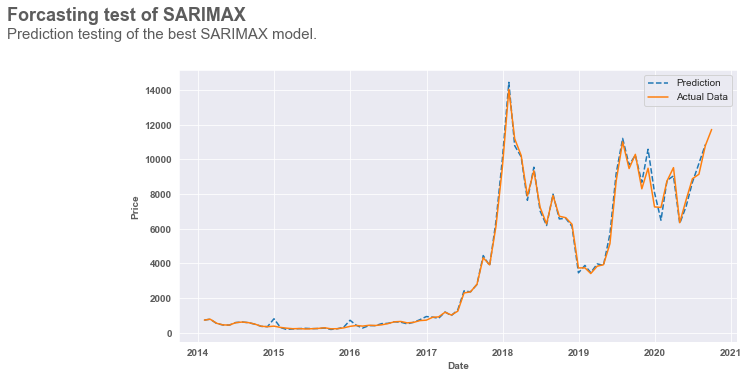

In [40]:
ax, fig = plt.subplots(figsize = (10,5))

plt.plot(data_arima_prediction["Forcasting"].shift(-1), ls="--", label="Prediction")
plt.plot(data_arima_prediction["Weighted_Price"], label="Actual Data")

plt.xticks(alpha=0.75, weight="bold")
plt.yticks(alpha=0.75, weight="bold")

plt.xlabel("Date",alpha=0.75, weight="bold")
plt.ylabel("Price",alpha=0.75, weight="bold")

plt.legend()

plt.text(x=datetime.date(2011, 6, 30), y=18000, s="Forcasting test of SARIMAX",
fontsize=18, weight="bold", alpha=0.75)
plt.text(x=datetime.date(2011, 6, 30), y=17000, s="Prediction testing of the best SARIMAX model.",fontsize=15, alpha=0.75)